In [11]:
import numpy as np

class ScratchLogisticRegression():
  def __init__(self, num_iter, lr, bias, verbose, lam):
    self.num_iter = num_iter
    self.lr = lr
    self.bias = bias
    self.verbose = verbose
    self.lam = lam
    self.theta = np.array([])
    self.loss = np.array([])
    self.val_loss = np.array([])

  def save_model(self, filename="scratch_logistic_model.pkl"):
    with open(filename, 'wb') as f:
      pickle.dump(self, f)

  @staticmethod
  def load_model(filename="scratch_logistic_model.pkl"):
    with open(filename, 'rb') as f:
      return pickle.load(f)


  def save_weights(self, filename="weights.npz"):
    np.savez(filename,
             theta=self.theta,
             loss=self.loss,
             val_loss=self.val_loss)

  def load_weights(self, filename="weights.npz"):
    data = np.load(filename)
    self.theta = data['theta']
    self.loss = data['loss']
    self.val_loss = data['val_loss']


  #【problem1】Hypothetical function
  def _sigmoid(self, y):
    return 1 / (1 + np.exp(-y))

  def _logistic_hypothesis(self, X):
    pred = X @ self.theta
    pred = self._sigmoid(pred)
    return pred

  #【problem2】Steepest descent
  def _gradient_descent(self, x, y):
    m = x.shape[0]
    n = x.shape[1]
    pred = self._logistic_hypothesis(x)
    for j in range(n):
      gradient = 0
      for i in range(m):
        gradient += (pred[i] - y[i]) * x[i, j]
        self.theta[j] = self.theta[j] - self.lr * ((gradient + self.lam * self.theta[j]) / m)

  #【problem 3】Estimated

  def predict(self, X):
    proba = self.predict_proba(X)
    threshold = 0.5
    return (proba >= threshold).astype(int)

  def predict_proba(self, X):
    if self.bias == True and X.shape[1] + 1 == self.theta.shape[0]:
      a = np.ones((X.shape[0], 1))
      X = np.hstack([a, X])
    pred = self._logistic_hypothesis(X)
    return pred

  #[Problem 4] Objective function
  def _loss_func(self, pred, y):
    error = 0
    for i in range(y.shape[0]):
      error += -np.sum(y[i] * np.log(pred[i]) + (1 - y[i]) * np.log(1 - pred[i]))
    loss = error / (y.shape[0])
    loss = loss + np.sum(self.theta**2) * self.lam / (2 * y.shape[0])
    return loss



  #[Problem 5] Learning and estimation
  def fit(self, X_train, y_train, X_val = None, y_val = None):
    X = X_train.copy()
    y = y_train.copy().reshape(-1, 1)
    if self.bias:
      bias = np.ones((X.shape[0], 1))
      X = np.hstack((bias, X))
      if X_val is not None:
        bias_val = np.ones((X_val.shape[0], 1))
        X_val = np.hstack((bias_val, X_val))

    self.theta = np.zeros((X.shape[1], 1))

    for i in range(self.num_iter):
        pred = self._logistic_hypothesis(X)
        if X_val is not None:
            pred_val = self._logistic_hypothesis(X_val)

        self._gradient_descent(X, y)

        loss = self._loss_func(pred, y)
        self.loss = np.append(self.loss, loss)

        if X_val is not None:
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)

        if self.verbose and i % 100 == 0:
            print(f"Iteração {i}: Loss treino = {loss:.4f}", end='')
            if X_val is not None:
                print(f", Loss validação = {loss_val:.4f}")
            else:
                print()



In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 0]
y = y[y != 0]
y = (y == 2).astype(int)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001, bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

Iteração 0: Loss treino = 0.6931, Loss validação = 0.6931
Iteração 100: Loss treino = 0.5616, Loss validação = 0.5533
Iteração 200: Loss treino = 0.4763, Loss validação = 0.4661
Iteração 300: Loss treino = 0.4179, Loss validação = 0.4077
Iteração 400: Loss treino = 0.3761, Loss validação = 0.3671
Iteração 500: Loss treino = 0.3450, Loss validação = 0.3381
Iteração 600: Loss treino = 0.3211, Loss validação = 0.3166
Iteração 700: Loss treino = 0.3023, Loss validação = 0.3005
Iteração 800: Loss treino = 0.2871, Loss validação = 0.2881
Iteração 900: Loss treino = 0.2746, Loss validação = 0.2784
Iteração 1000: Loss treino = 0.2642, Loss validação = 0.2709
Iteração 1100: Loss treino = 0.2554, Loss validação = 0.2649
Iteração 1200: Loss treino = 0.2479, Loss validação = 0.2601
Iteração 1300: Loss treino = 0.2415, Loss validação = 0.2563
Iteração 1400: Loss treino = 0.2358, Loss validação = 0.2532
Iteração 1500: Loss treino = 0.2309, Loss validação = 0.2508
Iteração 1600: Loss treino = 0.2265,

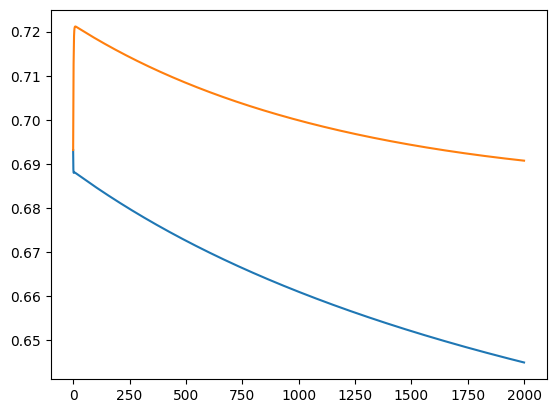

In [6]:
#[Problem 6] Plot of learning curve
import matplotlib.pyplot as plt

plt.plot(slr.loss)
plt.plot(slr.val_loss)

Iteração 0: Loss treino = 0.6931, Loss validação = 0.6931
Iteração 100: Loss treino = 0.6899, Loss validação = 0.6844
Iteração 200: Loss treino = 0.6870, Loss validação = 0.6787
Iteração 300: Loss treino = 0.6844, Loss validação = 0.6734
Iteração 400: Loss treino = 0.6819, Loss validação = 0.6685
Iteração 500: Loss treino = 0.6797, Loss validação = 0.6640
Iteração 600: Loss treino = 0.6775, Loss validação = 0.6598
Iteração 700: Loss treino = 0.6755, Loss validação = 0.6559
Iteração 800: Loss treino = 0.6736, Loss validação = 0.6523
Iteração 900: Loss treino = 0.6718, Loss validação = 0.6489
Iteração 1000: Loss treino = 0.6701, Loss validação = 0.6458
Iteração 1100: Loss treino = 0.6685, Loss validação = 0.6428
Iteração 1200: Loss treino = 0.6670, Loss validação = 0.6401
Iteração 1300: Loss treino = 0.6656, Loss validação = 0.6375
Iteração 1400: Loss treino = 0.6642, Loss validação = 0.6351
Iteração 1500: Loss treino = 0.6628, Loss validação = 0.6329
Iteração 1600: Loss treino = 0.6616,

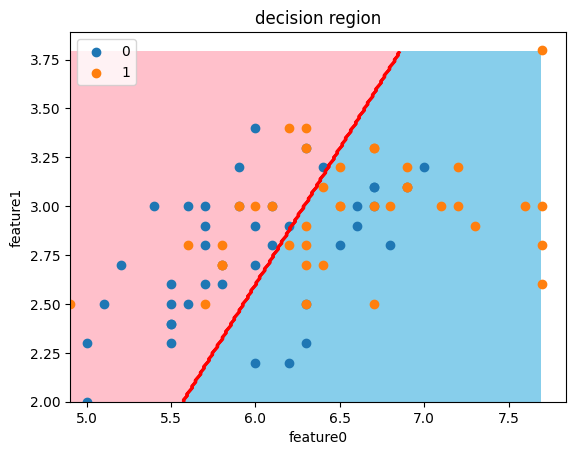

In [7]:
#[Problem 7] Visualization of decision area
from matplotlib.colors import ListedColormap

def decision_region(X, y, slr):
  mesh_f0, mesh_f1 = np.meshgrid(
      np.arange(np.min(X[:, 0]), np.max(X[:, 0]), 0.01),
      np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01),
  )
  mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
  y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
  plt.title("decision region")
  plt.xlabel("feature0")
  plt.ylabel("feature1")
  plt.contourf(mesh_f0, mesh_f1, y_pred, cmap=ListedColormap(["pink", "skyblue"]))
  plt.contour(mesh_f0, mesh_f1, y_pred, colors="red")
  plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="0")
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="1")
  plt.legend()
  plt.show()


X_vis = X[:, [0, 1]]
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2)

slr = ScratchLogisticRegression(num_iter=2000, lr=0.001, bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)
decision_region(X_train, y_train, slr);

In [8]:
#[Problem 8] (Advance assignment) Saving weights
import pickle
def save_model(self, filename="scratch_logistic_model.pkl"):
    with open(filename, 'wb') as f:
        pickle.dump(self, f)

@staticmethod
def load_model(filename="scratch_logistic_model.pkl"):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [9]:
def save_weights(self, filename="weights.npz"):
    np.savez(filename,
             theta=self.theta,
             loss=self.loss,
             val_loss=self.val_loss)

def load_weights(self, filename="weights.npz"):
    data = np.load(filename)
    self.theta = data['theta']
    self.loss = data['loss']
    self.val_loss = data['val_loss']

In [12]:
slr = ScratchLogisticRegression(num_iter=2000, lr=0.01, bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

slr.save_model("my_model.pkl")

modelo_recarregado = ScratchLogisticRegression.load_model("my_model.pkl")
print( modelo_recarregado.predict(X_test))

slr.save_weights("meus_pesos.npz")

novo_modelo = ScratchLogisticRegression(num_iter=2000, lr=0.01, bias=True, verbose=False, lam=0.1)
novo_modelo.load_weights("meus_pesos.npz")
print("Predição com pesos carregados:", novo_modelo.predict(X_test))

Iteração 0: Loss treino = 0.6931, Loss validação = 0.6931
Iteração 100: Loss treino = 1.9760, Loss validação = 2.2582
Iteração 200: Loss treino = 1.9407, Loss validação = 2.2061
Iteração 300: Loss treino = 1.9198, Loss validação = 2.1751
Iteração 400: Loss treino = 1.9089, Loss validação = 2.1589
Iteração 500: Loss treino = 1.9044, Loss validação = 2.1524
Iteração 600: Loss treino = 1.9036, Loss validação = 2.1519
Iteração 700: Loss treino = 1.9046, Loss validação = 2.1547
Iteração 800: Loss treino = 1.9063, Loss validação = 2.1591
Iteração 900: Loss treino = 1.9082, Loss validação = 2.1642
Iteração 1000: Loss treino = 1.9098, Loss validação = 2.1693
Iteração 1100: Loss treino = 1.9110, Loss validação = 2.1740
Iteração 1200: Loss treino = 1.9119, Loss validação = 2.1784
Iteração 1300: Loss treino = 1.9123, Loss validação = 2.1822
Iteração 1400: Loss treino = 1.9124, Loss validação = 2.1856
Iteração 1500: Loss treino = 1.9123, Loss validação = 2.1885
Iteração 1600: Loss treino = 1.9120,